# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# !pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


#During the build, I started with a much smaller dataset (~20) then increased it as the code became more complete.

540

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"


lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 0

length = len(cities)
cities_found = []
# from datetime import datetime as dt

for city in cities: 
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city+ "&units=imperial" 
#     print(query_url)
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
#     pprint(weather_json)
# place an exception handling here   

    record += 1
    
    try: 
        
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        cities_found.append(weather_json['name'])
    
    except:
        print ("city not found")
        
        
    print(f"#{record}: {city}")

#1: lazurne
city not found
#2: ijaki
#3: rikitea
#4: elizabeth city
#5: bethel
#6: victoria
#7: nelson bay
#8: mataura
#9: tamuin
city not found
#10: tsihombe
#11: lompoc
#12: antofagasta
city not found
#13: saleaula
#14: simoes
city not found
#15: jhikargachha
#16: punta arenas
#17: manta
#18: port-gentil
#19: oranjestad
#20: ipora
#21: puerto ayora
#22: saint-pierre
#23: olafsvik
#24: ponta do sol
#25: touros
#26: ahipara
#27: cape town
#28: alta floresta
#29: omaruru
#30: diffa
city not found
#31: attawapiskat
#32: vaitape
city not found
#33: nizhneyansk
#34: cabo san lucas
#35: codrington
#36: kapaa
#37: ilulissat
#38: urumqi
#39: yuryevets
#40: necochea
#41: hamilton
#42: new norfolk
#43: saskylakh
#44: bluff
#45: port elizabeth
#46: provideniya
#47: ushuaia
#48: jamestown
#49: iqaluit
#50: komsomolskiy
#51: haines junction
#52: busselton
#53: vaini
city not found
#54: taolanaro
#55: ketchikan
#56: lebu
#57: olinda
#58: mahebourg
city not found
#59: barentsburg
#60: roald
#61: amb

#501: kenora
#502: goderich
#503: roma
#504: paungde
#505: vestmannaeyjar
#506: angoram
#507: baghmara
city not found
#508: sentyabrskiy
#509: krasnogorsk
#510: pangai
#511: praia da vitoria
#512: pochutla
#513: bouloupari
#514: tahe
#515: miyako
#516: coffs harbour
#517: cap-aux-meules
city not found
#518: bolungarvik
#519: hami
#520: ojinaga
#521: khomutovka
#522: port blair
#523: hannibal
#524: waitati
#525: kudahuvadhoo
#526: daru
#527: yerbogachen
city not found
#528: kadykchan
city not found
#529: sedelnikovo
#530: muscat
#531: balugo
#532: marsaxlokk
#533: marquette
#534: port augusta
#535: puerto ayacucho
#536: bucerias
#537: lagos de moreno
#538: tigzirt
#539: storforshei
city not found
#540: grand river south east


In [ ]:
#Created empty list for each attribute to be leveraged in the analysis.  Ran into issues with the loop initially then
# realized that it's due to missing exception handling.  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_data = pd.DataFrame({"City": cities_found,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date})

weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lazurne,46.08,32.53,48.20,93,75,6.71,UA,1604287136
1,Rikitea,-23.12,-134.97,74.17,86,72,24.36,PF,1604286756
2,Elizabeth City,36.29,-76.25,59.00,93,1,12.75,US,1604287136
3,Bethel,41.37,-73.41,44.60,65,75,9.17,US,1604287345
4,Hong Kong,22.29,114.16,81.00,60,100,1.01,HK,1604287285
...,...,...,...,...,...,...,...,...,...
488,Puerto Ayacucho,5.66,-67.62,73.53,95,100,0.36,VE,1604287284
489,Bucerías,20.75,-105.33,77.41,85,1,4.27,MX,1604287213
490,Lagos de Moreno,21.35,-101.92,55.09,44,0,11.45,MX,1604287191
491,Tigzirt,36.89,4.12,63.75,58,0,3.49,DZ,1604287285


In [9]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02
mean,19.881136,17.162089,57.169229,72.675456,51.862069,8.593529,1.604287e+09
std,34.044957,90.689242,21.831913,19.642024,39.978465,6.333324,1.255326e+02
min,-54.800000,-175.200000,-14.440000,8.000000,0.000000,0.360000,1.604287e+09
25%,-8.570000,-62.050000,42.800000,63.000000,4.000000,3.850000,1.604287e+09
50%,25.700000,20.040000,62.600000,77.000000,60.000000,6.930000,1.604287e+09
75%,49.490000,91.390000,75.180000,87.000000,90.000000,11.450000,1.604287e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,51.670000,1.604287e+09


In [10]:
#writing to a CSV

weather_data.to_csv(output_data_file, index = False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
humid_cities = weather_data[weather_data["Humidity"] > 90].index

#There were no cities with humidity over 100% so, for the purpose of getting an exercise, lowered the threshold to 90%...

In [16]:
#  Get the indices of cities that have humidity over 100%.
humid_cities

Int64Index([  0,   2,  16,  23,  38,  41,  47,  48,  54,  60,  61,  64,  67,
             68,  69,  82,  86,  89,  90,  93,  94,  95,  97, 108, 109, 111,
            118, 122, 126, 132, 147, 148, 166, 179, 188, 190, 192, 196, 202,
            205, 208, 215, 217, 219, 228, 232, 234, 239, 241, 243, 250, 251,
            265, 266, 267, 274, 279, 284, 286, 292, 294, 297, 299, 308, 313,
            318, 321, 323, 342, 344, 345, 350, 351, 367, 368, 373, 376, 388,
            392, 393, 396, 404, 418, 426, 433, 435, 436, 440, 442, 454, 455,
            465, 470, 476, 485, 488],
           dtype='int64')

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data.drop(humid_cities, inplace = False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Rikitea,-23.12,-134.97,74.17,86,72,24.36,PF,1604286756
3,Bethel,41.37,-73.41,44.60,65,75,9.17,US,1604287345
4,Hong Kong,22.29,114.16,81.00,60,100,1.01,HK,1604287285
5,Nelson Bay,-32.72,152.15,71.60,56,40,20.80,AU,1604287345
6,Mataura,-46.19,168.86,57.00,65,40,10.00,NZ,1604286759
...,...,...,...,...,...,...,...,...,...
487,Port Augusta,-32.50,137.77,86.00,27,28,11.41,AU,1604287283
489,Bucerías,20.75,-105.33,77.41,85,1,4.27,MX,1604287213
490,Lagos de Moreno,21.35,-101.92,55.09,44,0,11.45,MX,1604287191
491,Tigzirt,36.89,4.12,63.75,58,0,3.49,DZ,1604287285


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

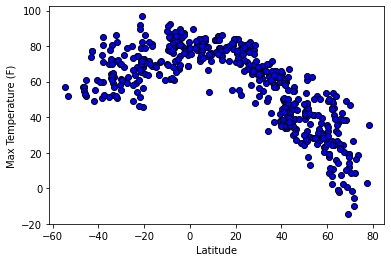

In [52]:
# Generate a scatter plot of latidude vs. Max Temperature

# scatter_plot_df

plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black")
weather_data
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/lat_vs_temp.png")

In [ ]:
#generally, no surprise with the temperature change observed here as a city gets further away from the equator...  
#Found it a little odd that, no matter the size of the dataset or the number of times I ran the code, there seem to be 
#more data points (or cities in this analysis) in the tip of northern hemisphere vs. the tip of southern hemisphere...  


## Latitude vs. Humidity Plot

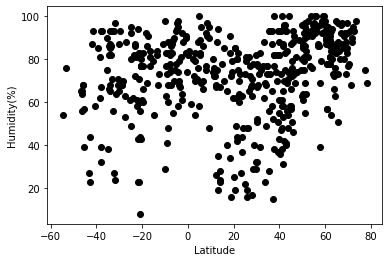

In [53]:
# Generate a scatter plot of latidude vs. Humidity

# scatter_plot_df

plt.scatter(lat, humidity, marker="o", facecolors="black", edgecolors="black")
weather_data
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("../Images/lat_vs_humid.png")

In [ ]:
#Not seeing any strong correlation between latitude and humidity.  I noticed that the bottom right corner is fairly empty
#which I beleive means that the cities near the tip of the northern hemisphere teen to be more humid...  Also right near
# the equator.

## Latitude vs. Cloudiness Plot

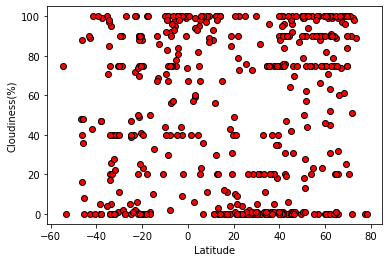

In [54]:
plt.scatter(lat, cloudiness, marker="o", facecolors="red", edgecolors="black")
weather_data
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("../Images/lat_vs_cloud.png")

In [ ]:
#Need to understand why there seems to be clutters at 0% and 100% Cloudiness...  

## Latitude vs. Wind Speed Plot

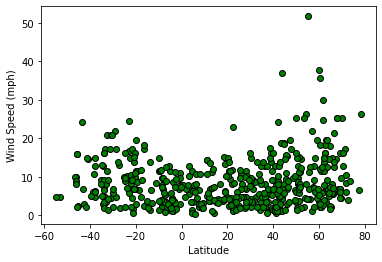

In [55]:
plt.scatter(lat, wind_speed, marker="o", facecolors="green", edgecolors="black")
weather_data
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/lat_vs_wind.png")

In [ ]:
#in both hemispheres, large clusters in wind speed < 10 mph

## Linear Regression

In [22]:
weather_data.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

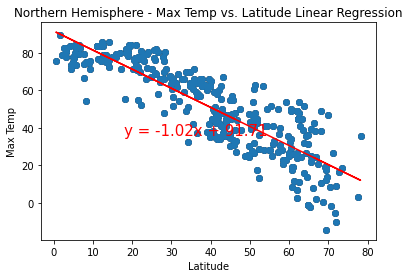

In [58]:
north_hemi = weather_data.loc[weather_data['Lat'] > 0 ]

x_values = north_hemi ["Lat"]
y_values = north_hemi["Max Temp"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")
# north_hemi
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../Images/nor_hemi_lat_vs_temp.png")

In [57]:
cor_coef = round(st.pearsonr(x_values,y_values)[0],2)
cor_coef

-0.87

In [33]:
north_hemi.count()

City          331
Lat           331
Lng           331
Max Temp      331
Humidity      331
Cloudiness    331
Wind Speed    331
Country       331
Date          331
dtype: int64

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

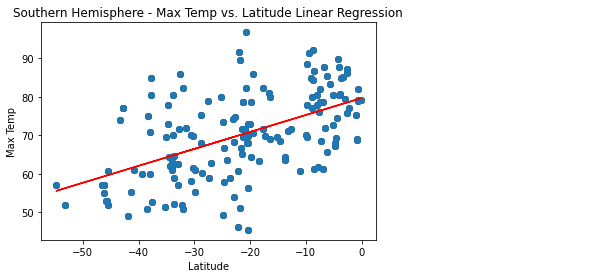

In [60]:
south_hemi = weather_data.loc[weather_data['Lat'] < 0 ]

x_values = south_hemi ["Lat"]
y_values = south_hemi["Max Temp"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("../Images/south_hemi_lat_vs_temp.png")

In [32]:
south_hemi.count()

City          162
Lat           162
Lng           162
Max Temp      162
Humidity      162
Cloudiness    162
Wind Speed    162
Country       162
Date          162
dtype: int64

In [29]:
cor_coef = round(st.pearsonr(x_values,y_values)[0],2)
cor_coef

0.53

In [ ]:
#there's a strong negative linear relationship between lattitude and max tempearature in northern hemisphere... 
#in the southern hemisphere however, the relationship isn't as strong as it's moderately positive...
#this could be attributed to that there are more cities in the northern hemisphere dataset vs. the southern hemisphere.
#would be interesting to see if there were more cities near the tip of the southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

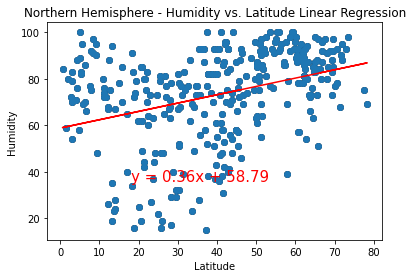

In [61]:
x_values = north_hemi ["Lat"]
y_values = north_hemi["Humidity"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.savefig("../Images/nor_hemi_lat_vs_humid.png")

In [38]:
cor_coef = round(st.pearsonr(x_values,y_values)[0],2)
cor_coef

0.34

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

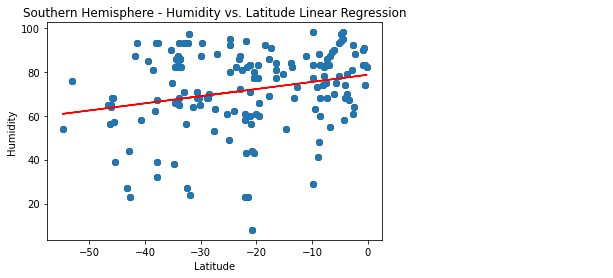

In [62]:
x_values = south_hemi ["Lat"]
y_values = south_hemi["Humidity"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.savefig("../Images/south_hemi_lat_vs_humid.png")

In [36]:
cor_coef = round(st.pearsonr(x_values,y_values)[0],2)
cor_coef

0.24

In [ ]:
#weak linear relationship between latitude and humidity...  the data suggests northern hemisphere cities might experience
#a bit more humidity as it gets further away from the equator (compared to southern hemisphere).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

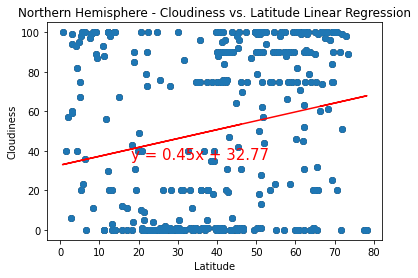

In [63]:
x_values = north_hemi ["Lat"]
y_values = north_hemi["Cloudiness"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.savefig("../Images/nor_hemi_lat_vs_cloud.png")

In [40]:
cor_coef = round(st.pearsonr(x_values,y_values)[0],2)
cor_coef

0.21

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

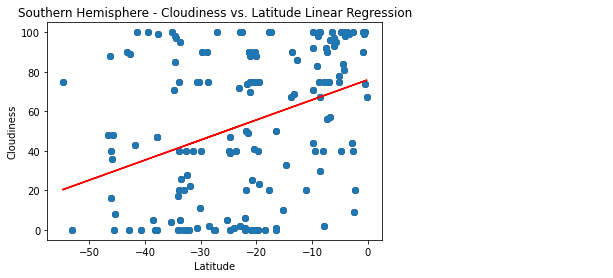

In [64]:
x_values = south_hemi ["Lat"]
y_values = south_hemi["Cloudiness"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.savefig("../Images/south_hemi_lat_vs_cloud.png")

In [42]:
cor_coef = round(st.pearsonr(x_values,y_values)[0],2)
cor_coef

0.37

In [ ]:
#similar to humidity, there's no strong correlation between latitude and cloudiness.  in the case of cloudiness, the data 
#suggests that the southern hemisphere has a bit more linear relationship (getting more cloudy as it gets closer to the 
#equator) than the northern hemisphere cities... but this could also be affected by certain weather patterns at the time.  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

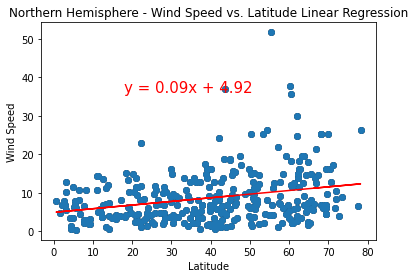

In [66]:
x_values = north_hemi ["Lat"]
y_values = north_hemi["Wind Speed"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.savefig("../Images/nor_hemi_lat_vs_wind.png")

In [44]:
cor_coef = round(st.pearsonr(x_values,y_values)[0],2)
cor_coef

0.27

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

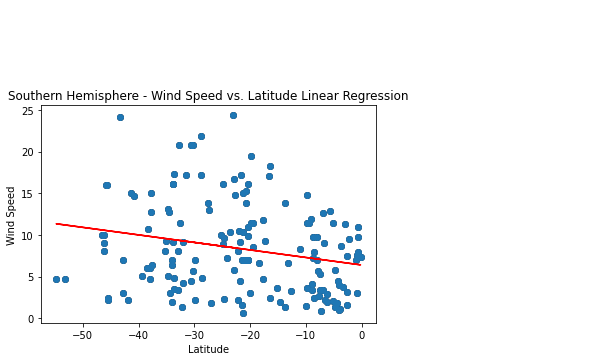

In [65]:
x_values = south_hemi ["Lat"]
y_values = south_hemi["Wind Speed"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.savefig("../Images/south_hemi_lat_vs_wind.png")

In [46]:
cor_coef = round(st.pearsonr(x_values,y_values)[0],2)
cor_coef

-0.23

In [ ]:
#Weak correlation between latitude and wind speed but the data suggests that the wind speed becomes stronger as a city is 
#located further away from the equator.  there are some outliers in each dataset however, would be interesting to see how 
#the removal would affect the overall linear relationship.  